In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Filter for Germany Data Analyst roles

In [29]:
df_DA_ger = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Analyst')]

In [30]:
df_plot = df_DA_ger['job_location'].value_counts().head(10).to_frame()

In [12]:
import seaborn as sns

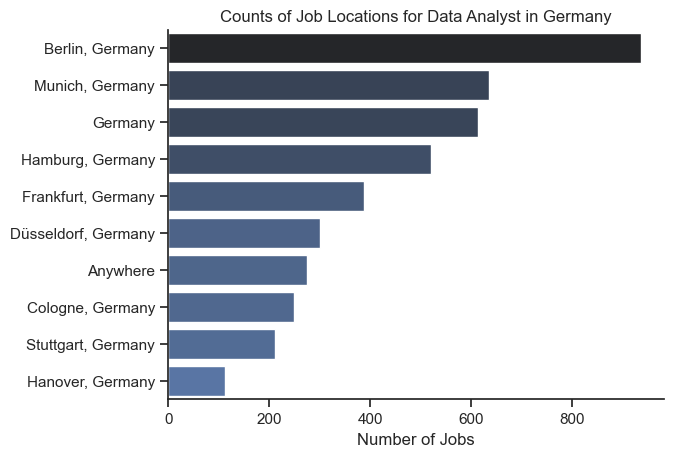

In [19]:
sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

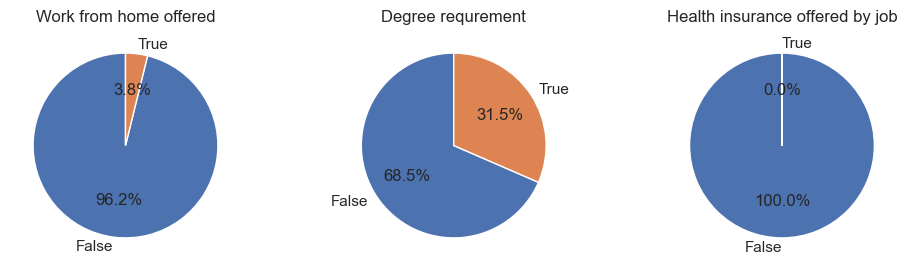

In [22]:
dict_column = {
    'job_work_from_home': "Work from home offered",
    'job_no_degree_mention': 'Degree requrement',
    'job_health_insurance': 'Health insurance offered by job'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 3)

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_ger[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

plt.show

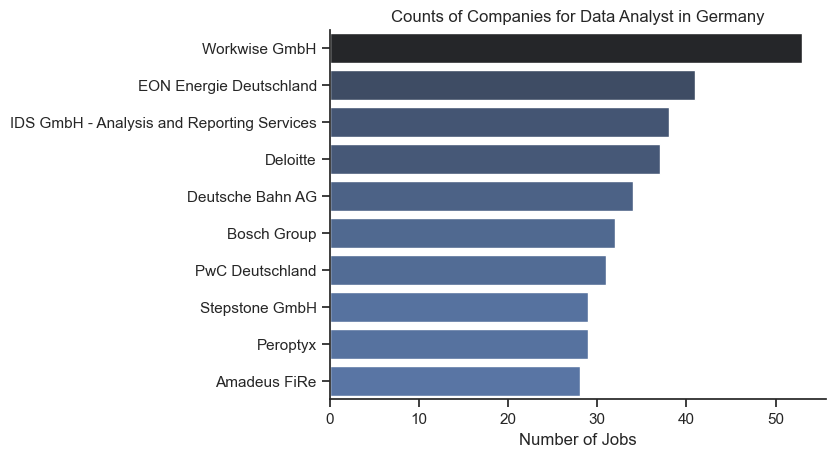

In [23]:
df_plot_company = df_DA_ger['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot_company, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

In [34]:
df_DA_ger.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
141,Data Analyst,Data Analyst & Process Developer (m/w/d),"Mettlach, Germany",via WTRF Jobs,Full-time,False,Germany,2023-05-02 13:24:54,True,False,Germany,None,NaN,NaN,Villeroy & Boch AG Hauptverwaltung,"[typescript, html, css, javascript, angular, sap]","{'analyst_tools': ['sap'], 'programming': ['ty..."
142,Data Analyst,Data Analyst (m/f/d),"Nuremberg, Germany",via Big Country Jobs,Full-time,False,Germany,2023-01-19 14:05:05,False,False,Germany,None,NaN,NaN,Symanto,"[python, r, sql, azure, power bi, excel, power...","{'analyst_tools': ['power bi', 'excel', 'power..."
175,Data Analyst,German speaking Data Analyst,"Bremen, Germany",via BeBee,Temp work,False,Germany,2023-11-19 13:17:23,False,False,Germany,None,NaN,NaN,Hito High Professionals GmbH,"[sap, excel]","{'analyst_tools': ['sap', 'excel']}"
220,Data Analyst,Inhouse Junior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-21 14:02:06,True,False,Germany,None,NaN,NaN,NEW YORKER Group-Services International GmbH &...,[windows],{'os': ['windows']}


In [40]:
df_BER_DA = df_DA_ger[(df_DA_ger['job_location'] == 'Berlin, Germany') & (df['job_title_short'] == 'Data Analyst')]

/var/folders/rx/g_7y2v794k5cn91ncfww9jf00000gn/T/ipykernel_19706/3777804230.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_BER_DA = df_DA_ger[(df_DA_ger['job_location'] == 'Berlin, Germany') & (df['job_title_short'] == 'Data Analyst')]


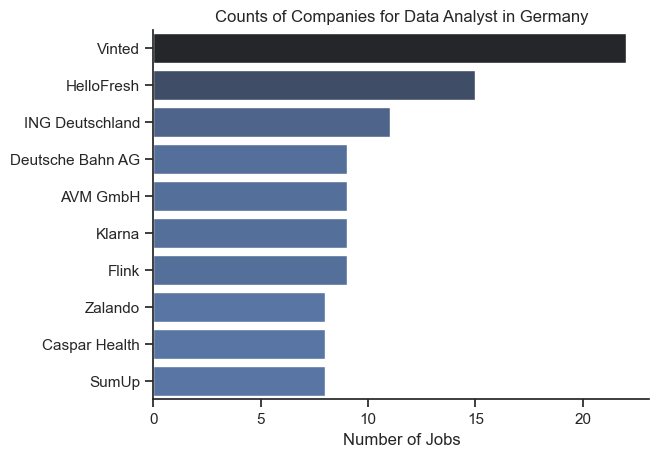

In [43]:
df_BER_company = df_BER_DA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_BER_company, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()